## Solución atómica para el modelo de Anderson

> En este pequeño notebook, se dará solución al modelo de anderson en el límite en el cual la banda de conducción colapsa a un estado.

In [1]:
 #Autoestados
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib.ticker as tk
from leer_archivos import read_file
from leer_archivos import LinearR2
from leer_archivos import colores
from leer_archivos import all_Maximos_ZT
from leer_archivos import density_ZT
import matplotlib


### Lectura de archivos

> Diferentes archivos fueron analizados en este trabajo, en las siguientes celdas se dara un overview sobre como extraer información sobre ellos

##### Datos generales:
> Los datos generales son un compendio de valores de las propiedades termoeléctricas para temperaturas entre 0.1 y 5.9 ($\Delta$)

In [8]:
## Al ejecutar esta celda, se obtiene la información de los datos de propiedades
## termoeléctricas entre T=0.1 a 5.9
Datos=[[] for i in range(59)]
for i in range(1,60):
    Datos[i-1]=read_file("./Complete DATA Between 0.1-5.9/DATA+"+str(round((i+1)*0.1,1))+".dat","./Complete DATA Between 0.1-5.9/DATA-"+str(round((i+1)*0.1,1))+".dat",19)
    

In [9]:
## Para realizar las gráficas se define una lista de etiquetas, correspodientes 
## al tipo de datos:
labels=[r"$E_{QD_1}$",r"Ajuste $E_{QD_1}$",r"Ajuste $E_{QD_2}$",r"$\%_{QD_2}$","$\%_{QD_1}$",r"$G^2$","S",r"$A_k$","Figura de mérito Z","WFR Wiedemann-Franz",r"$N_{QD_1}$",r"$N_{QD_2}$",r"$\phi_{local}$",r"$\phi_{QD_2}$",r"$\phi_{QD_1}$",r"$\phi_{eff}$","Mahan Soho S","Temperatura",r"$E_{QD_2}$"]


\begin{matrix}
Parámetro & E_{QD_1} & Ajuste E_{QD_1} & Ajuste E_{QD_2} & \%_{QD_2} & \%_{QD_1} & G^2 & S &  A_k & Merit\; Figure\;Z & WFR \\
Número & 0 & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 \\
\end{matrix}
\begin{matrix}
 N_{ocup 1D} & N_{ocup 2D} & \delta_{local\;G.F} & \delta_{QD_2} & \delta_{QD_1} & \delta_{eff} & \;Mahan\;Soho\; &  T & E_{QD_2} \\
10 & 11 & 12 & 13 & 14 & 15 & 16 & 17 & 18 \\
\end{matrix}


In [12]:
## En esta celda se decide que parámetros ejecutar:
i=int(input("Eje x: "))
j=int(input("Eje y: "))
## Aqui una pequeña condición sobre que datos graficar de toda la lista
## basados en su índice de la lista m equivalente a la (Temperatura):
def condicion(m):
    return (m+1)%20==0
#    return x<m<y
#    return m%n==0
#    return m=n


Eje x: 0
Eje y: 4


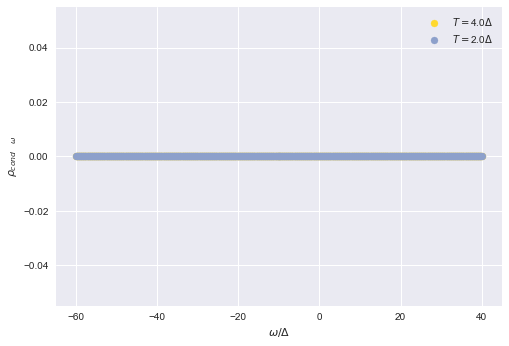

FileNotFoundError: [Errno 2] No such file or directory: '$\\omega/\\Delta$vs$\\rho_{cond\\quad\\omega}$.png'

<Figure size 576x396 with 0 Axes>

In [13]:
plt.figure()
plt.style.use("seaborn")
cmap = matplotlib.cm.get_cmap('Set2')
# mapas: tab20, viridis, Dark2, Accent, Paired
colors=colores()
for m in reversed(range(0,59)):
    x=Datos[m][i]
    y=Datos[m][j]
    #if(j==15):
    #    for a in range(len(y)):
    #        y[a]= np.cos(2*np.pi*y[a])
    #plt.plot(x,y,color='black',label=labels[i]+" vs "+labels[j])
    if (condicion(m)):
        plt.scatter(x,y,color=cmap(m/59.0),label=r"$T=$"+str(round((m+1)/10,1))+"$\Delta$")
plt.xlabel(labels[i])
plt.ylabel(labels[j])
## Escalas 
#plt.semilogy()
## Colocar límites
#plt.xlim([-40,20])
plt.legend()
plt.show()
plt.savefig(labels[i]+"vs"+labels[j]+".png")


#### Análisis de los máximos en ZT
> Las siguientes lineas de código detallan el análisis de los máximos obtenidos para cada temperatura de la figura de mérito:
##### Gráfica:

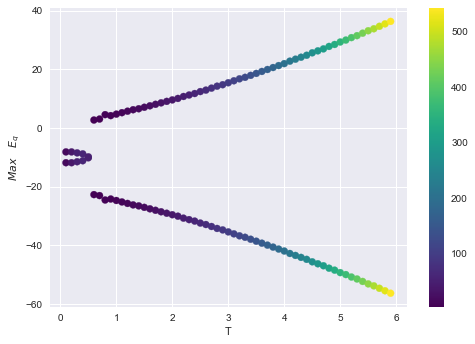

In [14]:
## Se crea la lista de temperaturas junto con los máximos:
T=[round((i+1)/10,1) for i in range(59)]
ZTES=all_Maximos_ZT(T,Datos,-10)
## Los datos obtenidos del paso anterior son graficados:
plt.scatter(ZTES[0,:],ZTES[1,:],c=ZTES[3,:],cmap='viridis',label=r"$Máximo\quad E_{q}\quad vs T$")
plt.scatter(ZTES[0,:],ZTES[2,:],c=ZTES[3,:],cmap='viridis',label=r"$Máximo\quad E_{q}\quad vs T$")
plt.xlabel(r"T")
plt.ylabel(r"$Max\quad E_{q}$")
plt.colorbar()

#### Gráfico de densidad:

48 600 600


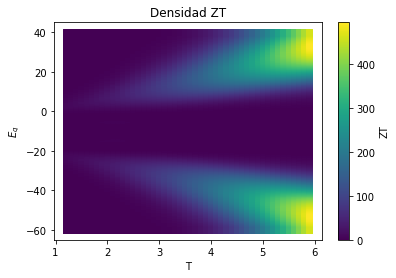

In [2]:
## Se crea un nuervo archivo Datos conteniendo lso puntos para T>1.0
Datos=[[] for i in range(50)]
for i in range(10,60):
    Datos[i-10]=read_file("./Complete DATA Between 0.1-5.9/DATA+"+str(round((i+1)*0.1,1))+".dat","./Complete DATA Between 0.1-5.9/DATA-"+str(round((i+1)*0.1,1))+".dat",19)
## Se calcula el conjunto de datos a graficar:
T=[round((i+1)/10,1) for i in range(11,59)]
ZTES=all_Maximos_ZT(T,Datos,-10)
## La función density_ZT genera la malla de valores a graficar:
density_zt=density_ZT(T,Datos)
## Inicio de la gráfica:
plt.title("Densidad ZT")
plt.scatter(density_zt[0,:],density_zt[1,:],c=density_zt[2,:],cmap='viridis',marker="s",label=r"$E_{q}\quad vs T$")
plt.xlabel(r"T")
plt.ylabel(r"$E_{q}$")
plt.colorbar(label="ZT")
plt.savefig("Density_ZT.pdf")

#### Regresión lineal

REGRESIONES LINEALES
y=mx+b 
 m= 6.406232527887537 \pm 0.06943797552584714 
 b= -4.394160033584097 \pm 0.2646094086712262 
 R^2 0.9946246622248525
y=mx+b 
 m= -6.406232527887535 \pm 0.06943797552584707 
 b= -15.605839966415912 \pm 0.26460940867122595 
 R^2 0.9946246622248525


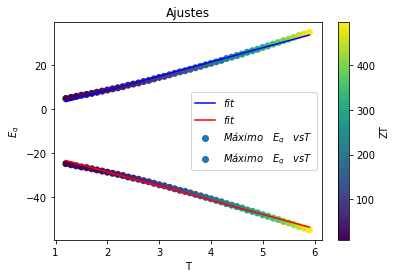

In [3]:
## Se generan los conjuntos de datos para la regresión:
TR = np.array(ZTES[0,:]).reshape((-1,1))
Emas = np.array(ZTES[1,:])
Emenos=np.array(ZTES[2,:])
## LinearR2 es la función utilizada para hacer dicho ajuste lineal
LR_1=LinearR2(TR,Emas)
LR_2=LinearR2(TR,Emenos)
Y1=LR_1[2]*TR+LR_1[0]
Y2=LR_2[2]*TR+LR_2[0]
## Comienzo de la gráfica:
plt.figure()
plt.title("Ajustes")
plt.scatter(ZTES[0,:],ZTES[1,:],c=ZTES[3,:],cmap='viridis',label=r"$Máximo\quad E_{q}\quad vs T$")
#plt.plot(ZTES[0,:],ZTES[1,:],color="red",label=r"$Máximo\quad E_{q}\quad vs T$")
plt.scatter(ZTES[0,:],ZTES[2,:],c=ZTES[3,:],cmap='viridis',label=r"$Máximo\quad E_{q}\quad vs T$")
plt.plot(TR,Y1,c="blue",label=r"$fit$")
plt.plot(TR,Y2,c="red",label=r"$fit$")
plt.xlabel(r"T")
plt.ylabel(r"$E_{q}$")
plt.colorbar(label="ZT")
plt.legend()
plt.savefig("Linear_fit_Density_ZT.pdf")
## Regresiones lineales encontradas
print("REGRESIONES LINEALES")
print(r"y=mx+b","\n","m=",LR_1[2],"\pm",LR_1[3],"\n","b=",LR_1[0],"\pm",LR_1[1],"\n","R^2",LR_1[4])
print(r"y=mx+b","\n","m=",LR_2[2],"\pm",LR_2[3],"\n","b=",LR_2[0],"\pm",LR_2[1],"\n","R^2",LR_2[4])

In [ ]:
## Los máximos encontrados se pueden hallar ejecutando esta celda:
for i in range(len(T)):
    print(T[i],ZTES[1,i],ZTES[2,i])

### Análisis del PES, la transmisión y la función de Green para los parámetros críticos

> Un nuevo conjunto de datos es analizado; son los datos del PES, IPES, $T(\omega)$ y la función de Green local y de conducción para diferentes energias.

In [6]:
## Hay dos conjuntos de datos, por tanto existen dos etiquetas:
labels1=[r"$\omega/\Delta$",r"$\rho_{Local\quad\omega}$",r"$PES_{local}(\omega)$",r"$IPES_{Local}(\omega)$",r"$\rho_{cond\quad\omega}$",r"$PES_{cond}(\omega)$",r"$IPES_{cond}(\omega)$",r"$\tau(\omega)$"]
labels2=[r"$\omega/\Delta$",r"$\Gamma \Delta$",r"$Im(G_{loc}(\omega))$",r"$Real(G_{loc}(\omega))$",r"$\Tau_{loc}$",r"$Im(G_{con}(\omega))$",r"$Real(G_{con}(\omega))$",r"$\Tau_{con}$"]
colors=["red","blue","orange","yellow","gray","green","magenta","black","cyan","purple","beige"]
## Aqui una pequeña condición sobre que datos graficar de toda la lista
k=bool(input("Positivo: "))
## Se define la lista de destino de los datos
PES=[[] for i in range(50)]
for i in range(6):
    if k is True:
        #PES[i]=read_file("./Complete PES for critic points between 1.0-5.9/PES+T"+str(round(i*0.5+1,1))+".dat","",8)
    else:
        #PES[i]=read_file("./Complete PES for critic points between 1.0-5.9/PES-T"+str(round(i*0.5+1,1))+".dat","",8)

Positivo: 0
Positivo: 0


In [ ]:
## Se eligen el conjunto de datos que se quiere graficar:
i=int(input("Eje x: "))
j=int(input("Eje y: "))
## Condición para graficar los datos
## basados en su índice de la lista m equivalente a la (Temperatura):
def condicion(m):
    return (m+1)%2==0
#    return x<m<y
#    return m%n==0
#    return m=n

In [ ]:
## Se grafican los datos de acuerdo a la condición:
plt.figure()
plt.title("Optical properties")
for m in range(50):
    if condicion(m):
        x=PES[m][i]
        y=PES[m][j]
        plt.scatter(x,y,color=colors[m],label=r"$T=$"+str(round(m*0.5+1,1))+"$\Delta$")
plt.xlabel(labels1[i])
plt.ylabel(labels1[j])
## Cambiar escala
#plt.semilogy()
## Colocar intervalos
#plt.xlim([-41.332,-41.276])
plt.legend()
plt.show()
plt.savefig(labels1[i]+"vs"+labels1[j]+".pdf")


#### Análisis de los estados confinados en el continuo

La alta eficiencia termoeléctrica en los puntos hallados, puede explicarse a través de un analisis de los polos de la amplitud de transmitancia dados por la función de Green:

In [11]:
##BOUND STATES
## Se define el conjunto de datos a examinar:
Temperatura=r"$T="+input("Escriba la temperatura:")+"\Delta $"
Title=r"$"+input("Escriba los parámetros:")+"$"

Escriba la temperatura:4.0
Escriba los parámetros:E_{QD1}=-41.3 \Delta E_{QD2}=-10 \Delta \; U=20 \Delta


In [12]:
k=int(input("Eje z: "))

Eje z: 2


In [ ]:
BOUND_STATES=read_file("PES-T4.dat","",8)
x=BOUND_STATES[0]
y=BOUND_STATES[1]
z=BOUND_STATES[k]
plt.figure()
plt.title(labels2[k]+" "+Title)
## Cambiar región
plt.xlim([-30.,-10])
## Cambiar escala
#plt.semilogy()
plt.scatter(x,y,c=z,cmap='viridis',label=labels2[k])
plt.xlabel(labels2[0])
plt.ylabel(labels2[1])
plt.colorbar(label=labels2[k])
plt.legend()
plt.show()
plt.savefig(labels2[0]+"vs"+labels2[1]+".pdf")

In [37]:
## Script made for make and adjust to the graphs:

##The next functions are the coefficients in the universal point:

def L0(T):
    eps=0.226022
    return 1/(T**2*(2**(1/eps)-1)+1)**(eps)

def L01(T):
    A0=11.945007
    A1=0.860404
    A2=63.2865
    eps=0.674506
    return A0*(T**(A1/eps)/((T**2)*(A2**(1/eps)-1)+1))**(eps)

def L01paper(T):
    #Definición paper:
    kb=1
    h=1
    A=2*np.pi**3*kb**2*0.923/(3*h)*T
    Se=0.728
    B=(T**2*(10.64**(1/Se)-1)+1)
    return A/B**Se

def L2(T):
    A0=3.29776
    A1=43.6995
    eps=0.238365
    return A0/(T**2*(2**(1/eps)+A1)+1)**(eps)

In [38]:
## This cell contains expressions for the roots:
def Roots(T,L0,L01,L2):
    h=1
    d=(np.pi**2)/6
    A=(L0-1/h)*(L2-d)+(L01**2)/4
    B=1/h*(d-L2)-d*(L0-1/h)
    C=d/h-(1/4)*L01**2
    D=np.sqrt(B**2-4*A*C)
    return [(-B+D)/(2*A),(-B-D)/(2*A)]


<ipython-input-38-aa167dcafccd>:8: RuntimeWarning: invalid value encountered in sqrt
  D=np.sqrt(B**2-4*A*C)


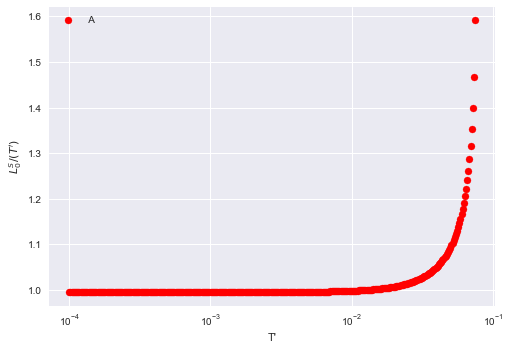

In [41]:
#logspace(a,b,esp) https://www.mathworks.com/help/matlab/ref/logspace.html
# a -> 10^{a}, b-> 10^{b}, esp=espaciado
T=np.logspace(-4,4,1000)
#Y=L01(T)
#Z=L0(T)
Y=[Roots(i,L0(i),L01paper(i),L2(i))[0] for i in T]
Y1=[Roots(i,L0(i),L01paper(i),L2(i))[1] for i in T]
YY=[[T[i],Y[i],Y1[i]] for i in range(0,len(T))  if np.isnan(Y[i]) == False and np.isnan(Y1[i]) == False]
YY=np.array(YY)
#print(YY)
plt.figure()
plt.style.use("seaborn")
#plt.scatter(YY[:,0],YY[:,1],color='black',label=" B ")
plt.scatter(YY[:,0],YY[:,2],color='red',label=" A ")
#plt.plot(T,Y,color='red',label=r"$L_{01}/T$")
#plt.plot(T,Z,color='blue',label=r"Ajuste $\quad L_{0}^{S}/T'$")
plt.semilogx()
#plt.ylim(-2,2)
plt.xlabel("T'")
plt.ylabel(r"$L_{0}^S/(T')$")
#L0
#plt.text(1,0.8,r"$L_{0}^{S}(T')= \left[{T'}^{2}\cdot(2^{1 /\ \epsilon}-1)+1 \right]^{- \epsilon}$",fontsize=14)
#plt.text(5,0.6,r"$\epsilon=0.226022$",fontsize=14)

#L01
#plt.text(0.3,0.4,r"$L_{01}^{S}(T')/T'= A_0\cdot T'^{A_1}\cdot\left[{T'}^{2}\cdot(A_2^{1 /\ \epsilon}-1)+1 \right]^{- \epsilon}$",fontsize=12)
#plt.text(5,0.3,r"$\epsilon=0.728 \quad A_0=19.07912$",fontsize=12)
#plt.text(5,0.2,r"$A_1= 1 \quad A_2=10.64$",fontsize=12)#A_1= 43.6995
#L2
#plt.text(0.2,2.5,r"$L_{2}^{S}(T')/T'^2= A_0\cdot\left[{T'}^{2}\cdot(2^{1 /\ \epsilon}+A_1)+1 \right]^{- \epsilon}$",fontsize=14)
#plt.text(1.25,2.,r"$\epsilon=0.238365 \quad A_0=3.29776$",fontsize=14)
#plt.text(50,1.5,r"$A_1= 43.6995$",fontsize=14)#A_1= 43.6995
plt.savefig("L0.png")
plt.legend(fontsize=20)
plt.legend()

In [90]:
F=read_file("2QDS-Universal.dat","",13)
#print(F)
plt.figure()
plt.style.use("seaborn")
plt.scatter(F[0],F[12],color='black',label=" B ")
#plt.scatter(F[0],F[2],color='red',label=" A ")
plt.semilogx()
#plt.ylim(-2,2)
plt.xlabel("a")
plt.ylabel("b")
plt.legend()

FileNotFoundError: [Errno 2] No such file or directory: '2QDS-Universal.dat'

## Gráfica 
![Raices](Raices.png)

###### PES
> Para el cálculo del PES, se debe tener la densidad espectral de estados $A(\omega)$, la función que describe el espectro de fotoemisión es: <br>

\begin{equation*}
I(\omega,T)=f_T(\omega)\cdot A(\omega,T)
\end{equation*}
#### Caracter FANO
> La curva de resonancia de **Fano** es debido a la interferencia entre dos amplitudes de scattering: una debido al scattering con un continuo de estados **(background process)** y otra debido a la excitación de un estado discreto **(scattering process)**. La energia de este estado resonante debe yacer en el continuo para que el efecto ocurra, cerca a la energia del estado resonante el espectro varia lentamente para el background process, en tanto que para el scattering process el espectro varia de magnitud y fase rápidamente lo que genera un **perfíl asimétrico**. 
> Un espectro tiene caracter **Fano** si es de la forma:
\begin{equation}
I(\omega,T) \propto \sigma_a \cdot \frac{q+\epsilon}{1+\epsilon^2}+\sigma_b
\end{equation}
> Donde $\epsilon=\frac{E-E_r}{\Gamma/2}$

In [71]:
#Para este cálculo se necesitan las librerias:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Sea PES y E dos arreglos:
PES=[0,1,2,3,4,5,6,7,8,910]
E=[0,1,2,3,5,6,7,8,9,10,11,12,13]
PES=np.asarray(PES)
E=np.asarray(E)

In [72]:
# Se define un espectro tipo Fano:
    return a*(q+ep)/(1+ep**2)+b
PES=I(E,1,11,11,11,11)
# Se utiliza la función Curve_fit de scipy:
parameters, covariance = curve_fit(I,E,PES)
print(parameters,covariance)

IndentationError: unexpected indent (<ipython-input-72-652af4390bfa>, line 2)

In [ ]:
#Despues de ello, es calculado el error estandar para cada parámetro:
SE = np.sqrt(np.diag(covariance))
print(SE)

In [40]:
print("A_0",2*np.pi**3*1**2*0.923/(3))
print("A_1",1)
print("A_2",10.64)
print("Epsilon",0.728)

A_0 19.079195583944486
A_1 1
A_2 10.64
Epsilon 0.728
